In [8]:
import numpy as np
import matplotlib.pyplot as plt

from distributions.distribution_by_sequence import DistributionBySequence
from distributions.distribution import Distribution
from distributions.sequence import Sequence
from algorithms.semi_bandit_exp3 import SemiBanditExp3
from algorithms.full_bandit_exp3 import FullBanditExp3
from algorithms.semi_bandit_ftrl import SemiBanditFTRL
from algorithms.uniform_random import UniformRandom
from algorithms.non_contextual_exp3 import NonContextualExp3
from experiment_manager.experiment_manager import ExperimentManager

from distributions.actionsets.msets import MSets

from distributions.contexts.binary_context import BinaryContext
from distributions.thetas.single_hole import SingleHole
from distributions.thetas.independent_bernoulli import IndependentBernoulli

In [9]:
exp_manager = ExperimentManager()
# algos = [NonContextualExp3(), UniformRandom()]
algos = [FullBanditExp3()]

length = 1000
d = 2
K = 2
actionset = MSets(K, 1)

dist_holes = Distribution(BinaryContext(d), SingleHole(K, d, np.array([0.7, 0.3])), actionset)

epsilon = 0.25 * np.min([np.sqrt(K / length), 1])
print("epsilon: ", epsilon)
p = np.zeros((d, K)) + 0.5
for i in range(d):
    p[i, 0] -= epsilon

dist_lower_bound = Distribution(BinaryContext(d), IndependentBernoulli(d, K, p), actionset)

epsilon:  0.011180339887498949


In [14]:
import cProfile
lenghts = [1000]
profile = cProfile.run("exp_manager.run(1, lenghts, algos, [dist_lower_bound])", sort="cumtime")

#data = exp_manager.run(3, lenghts, algos, [dist_lower_bound])
profile

Starting output/BinaryContext0.5_IndependentBernoulli1.0/1000/0/FullBanditExp3
Finishing output/BinaryContext0.5_IndependentBernoulli1.0/1000/0/FullBanditExp3 65.89378094673157
         21755693 function calls (21753675 primitive calls) in 66.100 seconds

   Ordered by: cumulative time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.000    0.000   66.100   66.100 {built-in method builtins.exec}
        1    0.000    0.000   66.099   66.099 <string>:1(<module>)
        1    0.000    0.000   66.099   66.099 experiment_manager.py:71(run)
        1    0.000    0.000   66.051   66.051 experiment_manager.py:54(single_run_helper)
        1    0.000    0.000   66.051   66.051 experiment_manager.py:22(single_run)
        1    0.011    0.011   65.896   65.896 algorithm.py:44(run_on_sequence)
      999    0.017    0.000   65.712    0.066 full_bandit_exp3.py:51(observe_loss)
      999    4.125    0.004   65.676    0.066 matrix_geometric_resampling.py:4(matri

ValueError: x and y can be no greater than 2-D, but have shapes (1,) and (1, 1, 3)

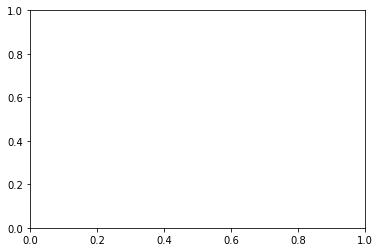

In [11]:
m = K
def theoretical_bound(T):
    return 8 * m * np.sqrt(T * K * d * np.log(np.e * K / m) * np.log(np.sqrt(T) * m * dist_lower_bound.context.true_sigma * dist_lower_bound.thetas.true_R))

import matplotlib.pyplot as plt

plt.plot(lenghts, data[0], label="SemiBanditExp3")
plt.plot(lenghts, data[1], label="UniformRandom")
#plt.plot(lenghts, theoretical_bound(np.array(lenghts)), label="Theretical Bound")
plt.legend()
plt.show()